<div class="alert">  
    <center><h1><strong>CM-3015 Machine Learning and Neural Networks finals: Training a model using DQN</strong></h1></center>

## Summary

<div class="alert alert-block alert-info">  
    <center><h2><strong>Problem definition and dataset loading</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Define the problem at hand and the data on which we’ll train. Collect this data, potentially annotate with labels (supervised learning). </b> 
<hr>
<ul>
    <li>1. What is the problem we are tackling? Text classification using Deep Learning and the Reuters dataset.</li>
    <li>1. How are we measuring success? Accuracy and function loss.</li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://paperswithcode.com/dataset/liar">https://paperswithcode.com/dataset/liar</a>
   
</div>

In [83]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras import layers, models
from tensorflow.keras.layers import TextVectorization

# Load the Reuters dataset
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Preprocessing the dataset</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
<ul>
    <ul> Vectorization:
    <li>1.Decodes the numerical sequences back into text using the dataset's word index. </li>
    <li>2.Uses TextVectorization to tokenize and vectorize the dataset into fixed-length sequences.. </li>
    <li>3.Returns vectorized data that can be used in deep learning models. </li>
</ul>
    
<hr>
<b>Source of Data: </b> 
<hr> 
 <a href="https://paperswithcode.com/dataset/liar">https://paperswithcode.com/dataset/liar</a>
   
</div>

In [84]:
# Helper function for vectorizing the data input
from tensorflow.keras.utils import to_categorical

# One-hot encode the sequences (vectorizing the input data)
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # Set specific indices to 1s
    return results

In [85]:
# One-hot encode the labels

vectorized_train_data = vectorize_sequences(train_data)
vectorized_test_data = vectorize_sequences(test_data)

# One-hot encode the output labels (categorical labels)
vectorized_train_labels = to_categorical(train_labels)
vectorized_test_labels = to_categorical(test_labels)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Building the baseline model</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
Here we will be building our model ...
<hr>


In [86]:
# Helper functions for building the model

from tensorflow.keras import models
from tensorflow.keras import layers

# Define the model
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(46, activation="softmax"))  # 46 classes in the dataset
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
    return model

def print_layer_tensor_shape(layer):
    weight_params = model.layers[layer].get_weights()[0]
    bias_params = model.layers[layer].get_weights()[1]
    print(layer, "\t", weight_params.shape, "\t", bias_params.shape)

In [87]:
# Building the model

model = build_model()
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

<div class="alert alert-block alert-info">  
    <center><h2><strong>Training and testing</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>Summary of the section </b> 
<hr>
✅ Fixed the Output Layer: The original code had Dense(64, activation="softmax"), but the Reuters dataset has 46 categories, so I updated it to Dense(46, activation="softmax").
✅ Used to_categorical(): This applies one-hot encoding to labels.
✅ Added Model Compilation & Training: Used "adam" optimizer and "categorical_crossentropy" since it's a multi-class classification task.
✅ Added Model Evaluation: Prints test accuracy after training.
<hr>


In [88]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

history = model.fit(vectorized_train_data, vectorized_train_labels, epochs=20, 
                    batch_size=512, 
                    validation_data=(vectorized_test_data, vectorized_test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(vectorized_test_data, vectorized_test_labels)
print(f"Test accuracy: {test_acc:.4f}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3268 - loss: 3.5083 - val_accuracy: 0.5873 - val_loss: 2.3057
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6323 - loss: 1.9345 - val_accuracy: 0.6776 - val_loss: 1.5286
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7300 - loss: 1.2869 - val_accuracy: 0.7213 - val_loss: 1.2662
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7961 - loss: 0.9528 - val_accuracy: 0.7529 - val_loss: 1.1255
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8392 - loss: 0.7558 - val_accuracy: 0.7752 - val_loss: 1.0248
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8812 - loss: 0.5742 - val_accuracy: 0.7850 - val_loss: 0.9700
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9112 - loss: 0.4459 - val_accuracy: 0.7903 - val_loss: 0.9398
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9304 - loss: 0.3445 - val_accuracy: 0.7956 - val_loss

<div class="alert alert-block alert-info">  
    <center><h2><strong>Evaluation</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Plots training values (e.g., loss or accuracy) using train_marker and train_label.
Plots validation values with val_marker and val_label.
Sets the title, x-axis, and y-axis labels.
Displays the legend to differentiate training and validation.
Calls plt.show() to render the plot.
This function will correctly generate the training vs validation loss or accuracy graphs when used in your code! 🚀
<hr>
<div>

In [89]:
# Helper function for the results evaluation

import matplotlib.pyplot as plt

def plot_epochs(epochs, 
                train_values, train_marker, train_label, 
                val_values, val_marker, val_label, 
                title, xlabel, ylabel):
    """
    Plots training and validation metrics over epochs.

    Parameters:
    epochs (list): List of epoch numbers.
    train_values (list): Training metric values.
    train_marker (str): Marker style for training plot.
    train_label (str): Label for training plot.
    val_values (list): Validation metric values.
    val_marker (str): Marker style for validation plot.
    val_label (str): Label for validation plot.
    title (str): Title of the plot.
    xlabel (str): Label for x-axis.
    ylabel (str): Label for y-axis.
    """
    plt.plot(epochs, train_values, train_marker, label=train_label)
    plt.plot(epochs, val_values, val_marker, label=val_label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

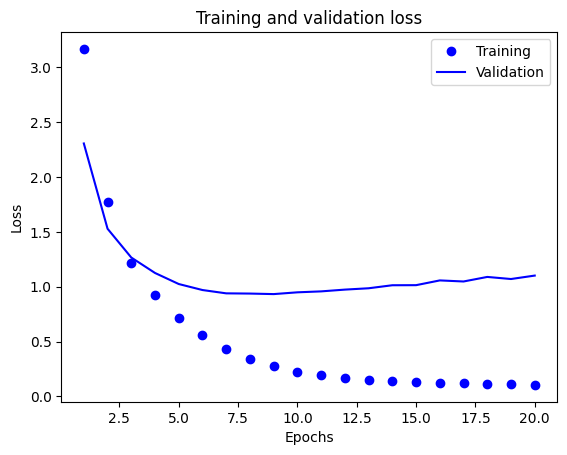

In [90]:
# Plotting the loss for training and validation

loss = history.history['loss']
val_loss = history.history['val_loss']

plot_epochs(range(1, len(loss) + 1), 
            loss, 
            "bo", "Training", 
            val_loss, "b", "Validation", 
            "Training and validation loss", 
            "Epochs", "Loss")

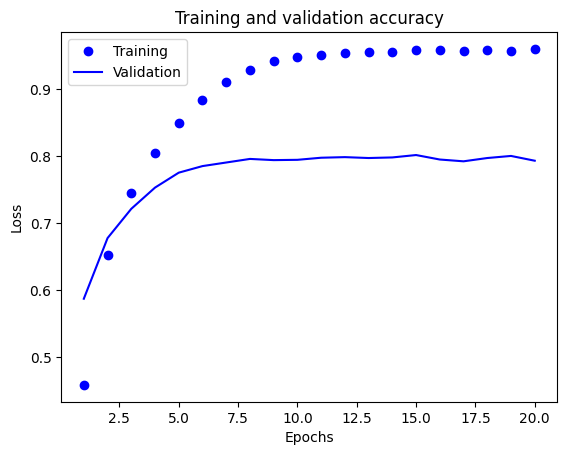

In [91]:
# Plotting the accuracy for training and validation

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plot_epochs(range(1, len(loss) + 1), 
            accuracy, 
            "bo", "Training", 
            val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

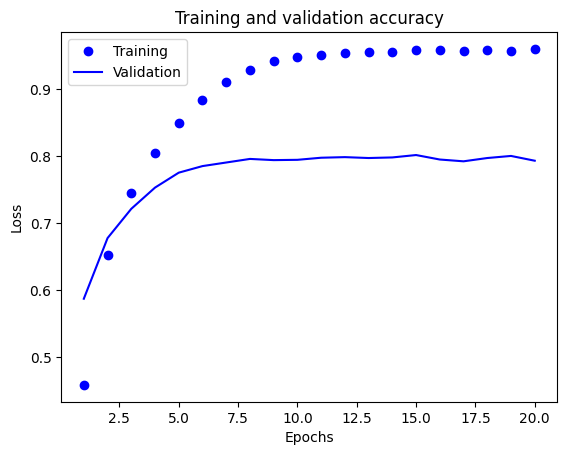

In [92]:
# Plotting the accuracy for training and validation

plot_epochs(range(1, len(loss) + 1), 
            accuracy, 
            "bo", "Training", 
            val_accuracy, "b", "Validation", 
            "Training and validation accuracy", 
            "Epochs", "Loss")

<div class="alert alert-block alert-info">  
    <center><h2><strong>Improving on the baseline model</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Choose an appropriate architecture (number of layers, neurons, activation functions).
Select an optimizer and loss function suited to the task.
<hr>
<div>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Model tuning</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Regularization techniques (Dropout, L1/L2).
Experiment with hyperparameters (learning rate, batch size, etc.).
<hr>
<div>

<div class="alert alert-block alert-info">  
    <center><h2><strong>Predicting on new data</strong></h2></center>

<div class="alert alert-block alert-warning">  
<b>How It Works: </b> 
<hr>
Load new unseen data: We take test samples from the Reuters dataset.
Vectorize the sequences: Convert them into the same format as training data.
Predict using the trained model: Outputs class probabilities (softmax values).
Get the predicted class: Use np.argmax() to find the most likely class.
Compare predictions to actual values: Check how well the model performs.
This will allow you to predict the category of new news articles using the trained model.
<hr>
<div>

In [93]:
# Helper functions for prediction

# Function to print all the mispredictions up until n
def get_misprediction(n, x_test_texts, x_test_vectorized, y_test, predictions, predicted_classes):
    if n  > len(y_test):
        return None
    
    for i in range(n):
        if predicted_classes[i] != y_test[i]:  # If prediction is incorrect
            print(f"Mispredicted Sample Found!\nText: {x_test_texts[i]}\nPredicted: {predicted_classes[i]}, Expected: {y_test[i]}")


In [94]:
# Make predictions on unseen data
predictions = model.predict(vectorized_test_data)

# Convert softmax output to class labels
predicted_classes = np.argmax(predictions, axis=1)

# vectorized_train_data = vectorize_sequences(train_data)
# vectorized_test_data = vectorize_sequences(test_data)

# # One-hot encode the output labels (categorical labels)
# vectorized_train_labels = to_categorical(train_labels)
# vectorized_test_labels = to_categorical(test_labels)

# Showing examples of the results an example of a misprediction
get_misprediction(100, test_data, vectorized_test_data, test_labels, predictions, predicted_classes)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step
Mispredicted Sample Found!
Text: [1, 2768, 283, 122, 7, 4, 89, 544, 463, 29, 798, 748, 40, 85, 306, 28, 19, 59, 11, 82, 84, 22, 10, 1315, 19, 12, 11, 82, 52, 29, 283, 1135, 558, 2, 265, 2, 6607, 8, 6607, 118, 371, 10, 1503, 281, 4, 143, 4811, 760, 50, 2088, 225, 139, 683, 4, 48, 193, 862, 41, 967, 1999, 30, 1086, 36, 8, 28, 602, 19, 32, 11, 82, 5, 4, 89, 544, 463, 41, 30, 6273, 13, 260, 951, 6607, 8, 69, 1749, 18, 82, 41, 30, 306, 3342, 13, 4, 37, 38, 283, 555, 649, 18, 82, 13, 1721, 282, 9, 132, 18, 82, 41, 30, 385, 21, 4, 169, 76, 36, 8, 107, 4, 106, 524, 10, 295, 3825, 2, 2476, 6, 3684, 6940, 4, 1126, 41, 263, 84, 395, 649, 18, 82, 838, 1317, 4, 572, 4, 106, 13, 25, 595, 2445, 40, 85, 7369, 518, 5, 4, 1126, 51, 115, 680, 16, 6, 719, 250, 27, 429, 6607, 8, 6940, 114, 343, 84, 142, 20, 5, 1145, 1538, 4, 65, 494, 474, 27, 69, 445, 11, 1816, 6607, 8, 109, 181, 2768, 2, 62, 1810, 6, 624, 901, 6940, 107, 4, 1126, 34, 524, 4, 6940, 1126, 41, 447, 7,